In [1]:
import scanpy as sc
import pandas as pd
import geopandas as gpd

In [2]:
adata = sc.read_h5ad('../data/xenium/outs/transcripts_anndata_final.h5ad')

In [3]:
gdf = gpd.read_file('../data/xenium/voronoi_tresholded_buffered.geojson')
gdf.crs = None

In [33]:
adata

AnnData object with n_obs × n_vars = 3204769 × 541
    obs: 'sample', 'start_x', 'start_y', 'end_x', 'end_y', 'center_x', 'center_y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'end_x', 'end_y', 'spatial', 'start_x', 'start_y'

In [34]:
adata.obs

sample       start_x       start_y         end_x         end_y   
bin                                                                            
(0, 1376)    sample1   5977.914968  19691.259132   5987.326733  19700.670896  \
(0, 1400)    sample1   5977.914968  19917.141485   5987.326733  19926.553249   
(0, 1402)    sample1   5977.914968  19935.965014   5987.326733  19945.376779   
(0, 1415)    sample1   5977.914968  20058.317955   5987.326733  20067.729720   
(0, 1425)    sample1   5977.914968  20152.435602   5987.326733  20161.847367   
...              ...           ...           ...           ...           ...   
(2201, 146)  sample1  26693.209086   8114.788543  26702.620851   8124.200308   
(2201, 147)  sample1  26693.209086   8124.200308  26702.620851   8133.612073   
(2201, 148)  sample1  26693.209086   8133.612073  26702.620851   8143.023838   
(2201, 153)  sample1  26693.209086   8180.670896  26702.620851   8190.082661   
(2201, 154)  sample1  26693.209086   8190.082661  26702.620851   8199.494426   

                 center_x      center_y  n_genes_by_counts   
bin                                                          
(0, 1376)     5982.620851  19695.965014                  1  \
(0, 1400)     5982.620851  19921.847367                  1   
(0, 1402)     5982.620851  19940.670896                  2   
(0, 1415)     5982.620851  20063.023838                  1   
(0, 1425)     5982.620851  20157.141485                  1   
...                   ...           ...                ...   
(2201, 146)  26697.914968   8119.494426                  2   
(2201, 147)  26697.914968   8128.906190                  1   
(2201, 148)  26697.914968   8138.317955                  1   
(2201, 153)  26697.914968   8185.376779                  1   
(2201, 154)  26697.914968   8194.788543                  1   

             log1p_n_genes_by_counts  total_counts  log1p_total_counts   
bin                                                                      
(0, 1376)                   0.693147             1            0.693147  \
(0, 1400)                   0.693147             1            0.693147   
(0, 1402)                   1.098612             2            1.098612   
(0, 1415)                   0.693147             1            0.693147   
(0, 1425)                   0.693147             1            0.693147   
...                              ...           ...                 ...   
(2201, 146)                 1.098612             2            1.098612   
(2201, 147)                 0.693147             1            0.693147   
(2201, 148)                 0.693147             1            0.693147   
(2201, 153)                 0.693147             1            0.693147   
(2201, 154)                 0.693147             1            0.693147   

             pct_counts_in_top_50_genes  pct_counts_in_top_100_genes   
bin                                                                    
(0, 1376)                         100.0                        100.0  \
(0, 1400)                         100.0                        100.0   
(0, 1402)                         100.0                        100.0   
(0, 1415)                         100.0                        100.0   
(0, 1425)                         100.0                        100.0   
...                                 ...                          ...   
(2201, 146)                       100.0                        100.0   
(2201, 147)                       100.0                        100.0   
(2201, 148)                       100.0                        100.0   
(2201, 153)                       100.0                        100.0   
(2201, 154)                       100.0                        100.0   

             pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  
bin                                                                    
(0, 1376)                          100.0                        100.0  
(0, 1400)                          100.0          

In [4]:
coords = adata.obs[['center_x', 'center_y']]

# Create a DataFrame
coords_df = pd.DataFrame(coords)

In [5]:
points_gdf = gpd.GeoDataFrame(coords_df, geometry=gpd.points_from_xy(coords_df.center_x, coords_df.center_y))

# Ensure the CRS matches with your existing GeoDataFrame
points_gdf.crs = None

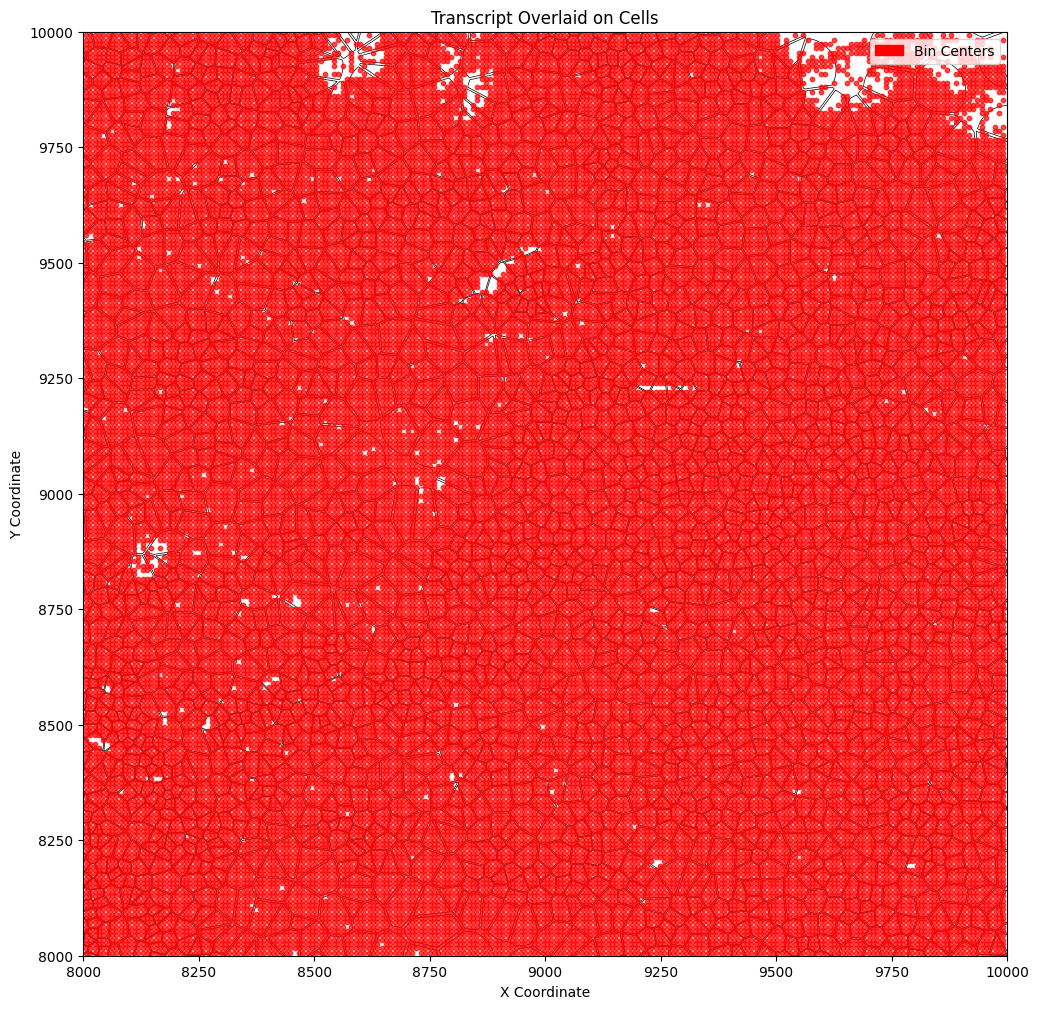

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from shapely.geometry import box
import geopandas as gpd

# Define bounding box
bbox = (8000, 8000, 10000, 10000)  # xmin, ymin, xmax, ymax

fig, ax = plt.subplots(figsize=(12, 12))

# Plot the GeoDataFrame polygons within the bounding box
gdf_clip = gdf[gdf.intersects(box(*bbox))]  # Filter GeoDataFrame
gdf_clip.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)

points_gdf_clip = points_gdf[points_gdf.intersects(box(*bbox))]
points_gdf_clip.plot(ax=ax, color='red', markersize=10, alpha=0.7)

# Set plot limits based on bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

legend_elements = [Patch(color='red', label='Bin Centers')]
ax.legend(handles=legend_elements, loc='upper right')

plt.title('Transcript Overlaid on Cells')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.show()


In [7]:
stardist = gpd.read_file('../data/xenium/stardist_all.geojson')

In [38]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt

def radius_from_area(area):
    return np.sqrt(area / np.pi) / 2

def create_circle(center, radius):
    return Point(center).buffer(radius)

# Sample GeoDataFrame (replace with your actual GeoDataFrame)
# gdf = gpd.read_file('your_file.geojson')

# Calculate radius and create circles
gdf['radius'] = gdf['geometry'].area.apply(radius_from_area)
gdf['centroid'] = gdf['geometry'].centroid
gdf['circle'] = gdf.apply(lambda row: create_circle(row['centroid'], row['radius']), axis=1)

# Create a new GeoDataFrame for circles
circles_gdf = gpd.GeoDataFrame(gdf, geometry='circle')

In [39]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt

def diameter_from_area(area):
    return np.sqrt(area / np.pi)*2

def create_circle(center, radius):
    return Point(center).buffer(radius)

# Sample GeoDataFrame (replace with your actual GeoDataFrame)
# gdf = gpd.read_file('your_file.geojson')

# Calculate radius and create circles
stardist['radius'] = stardist['geometry'].area.apply(diameter_from_area)
stardist['centroid'] = stardist['geometry'].centroid
stardist['circle'] = stardist.apply(lambda row: create_circle(row['centroid'], row['radius']), axis=1)

# Create a new GeoDataFrame for circles
stardist_circles_gdf = gpd.GeoDataFrame(stardist, geometry='circle')

/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_66865/442305176.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  stardist['radius'] = stardist['geometry'].area.apply(diameter_from_area)
/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_66865/442305176.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  stardist['centroid'] = stardist['geometry'].centroid


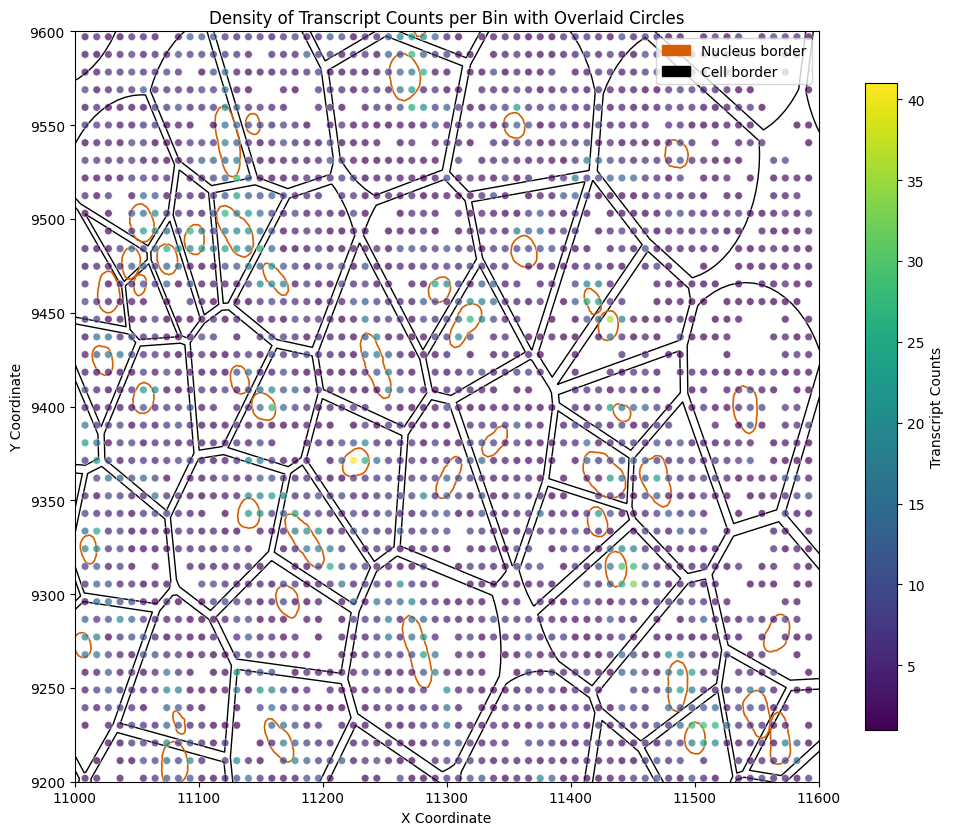

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
from shapely.geometry import box
import geopandas as gpd

# Define bounding box
bbox = (11000, 9200, 11600, 9600)  # xmin, ymin, xmax, ymax

# Define colors with better contrast and accessibility
cell_border_color = '#000000'  # Black
nucleus_border_color = '#D55E00'  # Dark orange (distinguishable for color blindness)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the GeoDataFrame polygons within the bounding box
gdf_clip = gdf[gdf.intersects(box(*bbox))]  # Filter GeoDataFrame
gdf_clip.plot(ax=ax, edgecolor=cell_border_color, facecolor='none', linewidth=1.0)

stardist_clip = stardist[stardist.intersects(box(*bbox))]  # Filter GeoDataFrame
stardist_clip.plot(ax=ax, edgecolor=nucleus_border_color, facecolor='none', linewidth=1.2)

# Extract and filter coordinates from the AnnData object
coords_df = pd.DataFrame(adata.obs[['center_x', 'center_y', 'total_counts']])
coords_df = coords_df.dropna()  # Drop any rows with NaN values

# Filter coordinates based on the bounding box
coords_df_filtered = coords_df[
    (coords_df['center_x'] >= bbox[0]) &
    (coords_df['center_x'] <= bbox[2]) &
    (coords_df['center_y'] >= bbox[1]) &
    (coords_df['center_y'] <= bbox[3])
]

# Overlay the points on the KDE plot
sns.scatterplot(
    x=coords_df_filtered['center_x'],
    y=coords_df_filtered['center_y'],
    hue=coords_df_filtered['total_counts'],
    palette='viridis',
    ax=ax,
    legend=None,
    marker='o',
    s=30,  # Adjust size as needed
    alpha=0.7
)

# Set plot limits based on bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=coords_df_filtered['total_counts'].min(), vmax=coords_df_filtered['total_counts'].max()))
cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label('Transcript Counts')

# Add legend
legend_elements = [
    Patch(color=nucleus_border_color, label='Nucleus border'),
    Patch(color=cell_border_color, label='Cell border'),
]
ax.legend(handles=legend_elements, loc='upper right')

# Set title and labels
plt.title('Density of Transcript Counts per Bin with Overlaid Circles')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.show()


In [9]:
import numpy as np
import pandas as pd

def fast_pdf(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

def compute_std_dev_from_area(gdf, k=1):
    # Compute std_dev based on the area of each polygon
    gdf['area'] = gdf['geometry'].area
    gdf['std_dev'] = k * np.sqrt(gdf['area'])
    return gdf

def assign_transcripts_to_polygons(transcripts_df, gdf, batch_size=1000):
    # Convert centroids to numpy array
    print('Convert centroids to numpy array')
    gdf['centroid'] = gdf['geometry'].centroid
    polygon_centroids = np.array([(p.x, p.y) for p in gdf['centroid']])
    
    # Extract transcript coordinates
    print('Extract transcript coordinates')
    transcript_coords = transcripts_df[['center_x', 'center_y']].values

    # Precompute squared norms
    print('Precompute squared norms')
    polygon_centroids_sq = np.sum(polygon_centroids**2, axis=1)[np.newaxis, :]

    # Initialize lists to collect weighted probabilities and chosen probabilities
    print('Compute distances and probabilities in batches')
    weighted_probabilities_list = []
    chosen_probabilities = []

    # Process in batches
    for i in range(0, len(transcript_coords), batch_size):
        transcript_batch = transcript_coords[i:i + batch_size]
        batch_transcript_sq = np.sum(transcript_batch**2, axis=1)[:, np.newaxis]
        batch_distances = np.sqrt(batch_transcript_sq + polygon_centroids_sq - 2 * np.dot(transcript_batch, polygon_centroids.T))

        # Extract std_dev for each polygon
        batch_std_dev = gdf['std_dev'].values

        # Calculate probabilities for the current batch
        batch_probabilities = np.zeros_like(batch_distances)
        for j in range(len(batch_std_dev)):
            batch_probabilities[:, j] = fast_pdf(batch_distances[:, j] / batch_std_dev[j]) / batch_std_dev[j]

        # Collect the weighted probabilities
        weighted_probabilities_list.append(batch_probabilities)

    # Combine weighted probabilities from all batches
    weighted_probabilities = np.vstack(weighted_probabilities_list)

    # Normalize the weighted probabilities to sum to 1
    print('Normalize the weighted probabilities to sum to 1')
    normalized_probabilities = weighted_probabilities / np.sum(weighted_probabilities, axis=1, keepdims=True)
    
    # Create a cumulative probability array for each transcript
    print('Create a cumulative probability array for each transcript')
    cumulative_probabilities = np.cumsum(normalized_probabilities, axis=1)
    
    # Generate random numbers for sampling
    random_values = np.random.rand(len(transcripts_df))
    
    # Determine chosen polygon indices
    print('Choose indices and extract probabilities')
    chosen_polygon_indices = np.argmax(cumulative_probabilities >= random_values[:, np.newaxis], axis=1)
    
    # Extract the corresponding probabilities
    chosen_probabilities = normalized_probabilities[np.arange(len(transcripts_df)), chosen_polygon_indices]
    
    # Assign polygon IDs and probabilities to transcripts
    print('Assign polygon IDs and probabilities to transcripts')
    transcripts_df.loc[:, 'assigned_polygon_id'] = gdf['id'].values[chosen_polygon_indices]
    transcripts_df.loc[:, 'assignment_probability'] = chosen_probabilities
    
    return transcripts_df

def process_large_dataset_in_batches(adata_obs, gdf, outer_batch_size=2000, inner_batch_size=1000):
    # Compute std_dev based on area
    gdf = compute_std_dev_from_area(gdf)

    # Initialize list to collect results from each outer batch
    results_list = []

    # Process in outer batches
    for start_idx in range(0, len(adata_obs), outer_batch_size):
        end_idx = min(start_idx + outer_batch_size, len(adata_obs))
        print(f'Processing batch {start_idx} to {end_idx}')
        
        # Extract the current batch from adata_obs
        batch_obs = adata_obs.iloc[start_idx:end_idx]

        # Call assign_transcripts_to_polygons on the current batch
        batch_result = assign_transcripts_to_polygons(batch_obs, gdf, batch_size=inner_batch_size)
        
        # Collect the result
        results_list.append(batch_result)

    # Combine results from all outer batches
    full_result = pd.concat(results_list, ignore_index=True)
    
    return full_result

# Example usage
transcripts_with_assignments = process_large_dataset_in_batches(coords_df_filtered, stardist_clip, outer_batch_size=2000, inner_batch_size=1000)

# Save to CSV
csv_file_path = 'transcripts_with_assignments.csv'
transcripts_with_assignments.to_csv(csv_file_path, index=False)


Processing batch 0 to 2000
Convert centroids to numpy array
Extract transcript coordinates
Precompute squared norms
Compute distances and probabilities in batches
Normalize the weighted probabilities to sum to 1
Create a cumulative probability array for each transcript
Choose indices and extract probabilities
Assign polygon IDs and probabilities to transcripts
Processing batch 2000 to 2412
Convert centroids to numpy array
Extract transcript coordinates
Precompute squared norms
Compute distances and probabilities in batches
Normalize the weighted probabilities to sum to 1
Create a cumulative probability array for each transcript
Choose indices and extract probabilities
Assign polygon IDs and probabilities to transcripts


/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_82309/2723911323.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area'] = gdf['geometry'].area
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

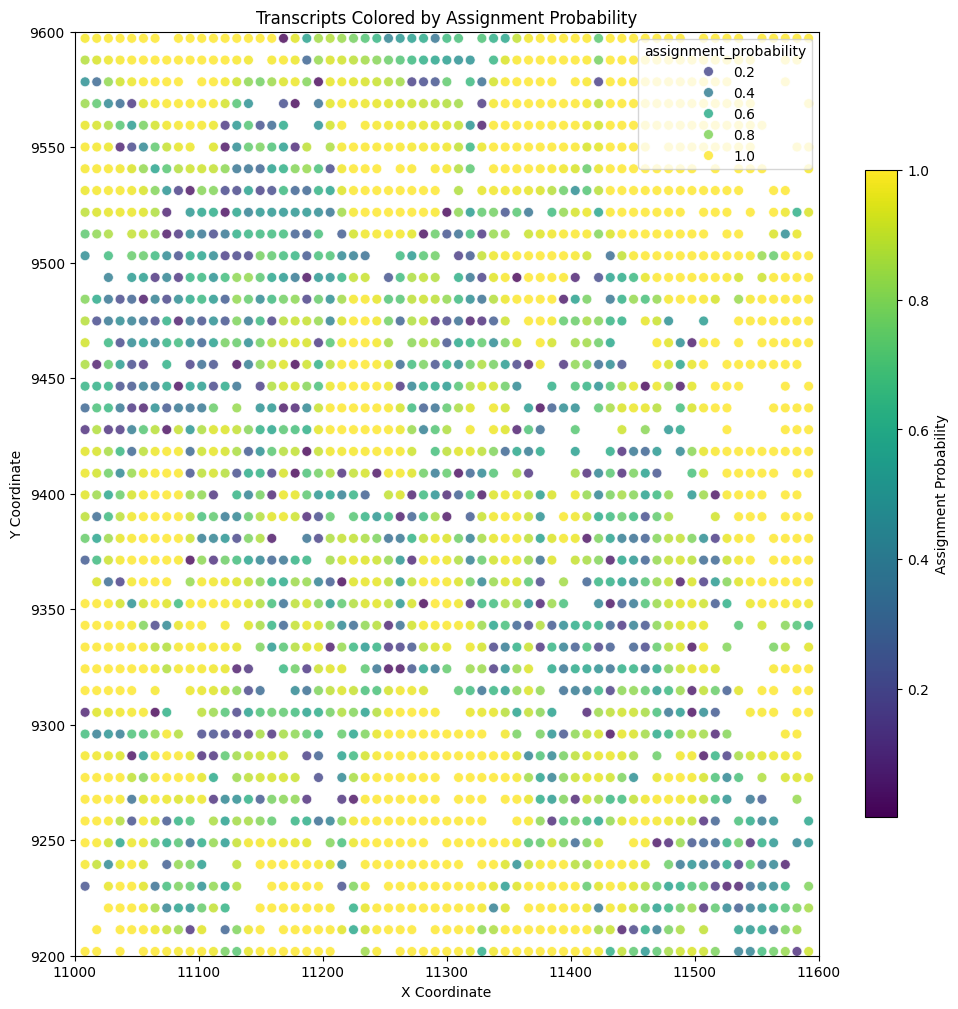

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define bounding box
bbox = (11000, 9200, 11600, 9600) # xmin, ymin, xmax, ymax

# Extract and filter coordinates from transcripts_with_assignments DataFrame
coords_df_filtered = transcripts_with_assignments
# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Overlay the points, coloring by assignment probability
sns.scatterplot(
    x=coords_df_filtered['center_x'],
    y=coords_df_filtered['center_y'],
    hue=coords_df_filtered['assignment_probability'],
    palette='viridis',
    ax=ax,
    marker='o',
    s=50,  # Adjust size as needed
    alpha=0.8
)

# Set plot limits based on bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

# Add colorbar for assignment probability
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=coords_df_filtered['assignment_probability'].min(), vmax=coords_df_filtered['assignment_probability'].max()))
cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label('Assignment Probability')

# Set title and labels
plt.title('Transcripts Colored by Assignment Probability')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.show()


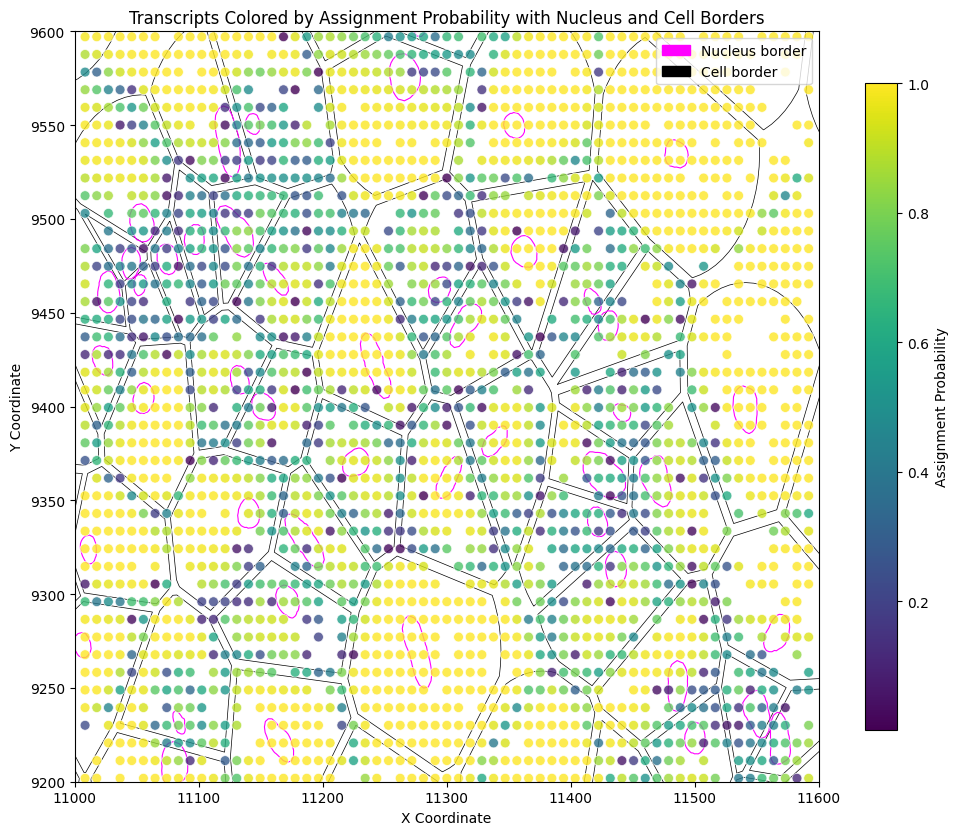

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch
from shapely.geometry import box
import geopandas as gpd

# Define bounding box
bbox = (11000, 9200, 11600, 9600) # xmin, ymin, xmax, ymax

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the GeoDataFrame polygons (cell borders) within the bounding box
gdf_clip.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)

# Plot the nucleus borders within the bounding box
stardist_clip.plot(ax=ax, edgecolor='magenta', facecolor='none', linewidth=0.8)

# Plot the transcript data points, colored by assignment probability
sns.scatterplot(
    x=transcripts_with_assignments['center_x'],
    y=transcripts_with_assignments['center_y'],
    hue=transcripts_with_assignments['assignment_probability'],
    palette='viridis',
    ax=ax,
    marker='o',
    s=50,  # Adjust size as needed
    alpha=0.8
)

# Set plot limits based on bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

# Add colorbar for assignment probability
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=transcripts_with_assignments['assignment_probability'].min(), vmax=transcripts_with_assignments['assignment_probability'].max()))
cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label('Assignment Probability')

# Add legend for nucleus and cell borders
legend_elements = [
    Patch(color='magenta', label='Nucleus border'),
    Patch(color='black', label='Cell border'),
]
ax.legend(handles=legend_elements, loc='upper right')

# Set title and labels
plt.title('Transcripts Colored by Assignment Probability with Nucleus and Cell Borders')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.show()


In [62]:
coords_df_filtered

center_x     center_y  n_genes_by_counts assigned_polygon_id   
0     11008.503203  9201.847367                  1            ID_39673  \
1     11008.503203  9230.082661                  1            ID_40397   
2     11008.503203  9239.494426                  4            ID_40397   
3     11008.503203  9248.906190                  3            ID_40397   
4     11008.503203  9258.317955                  2            ID_40397   
...            ...          ...                ...                 ...   
2407  11592.032615  9521.847367                  1            ID_41129   
2408  11592.032615  9540.670896                  1            ID_41133   
2409  11592.032615  9550.082661                  1            ID_41133   
2410  11592.032615  9568.906190                  1            ID_41133   
2411  11592.032615  9597.141485                  1            ID_41133   

      assignment_probability  
0                   0.999971  
1                   0.771668  
2                   0.986853  
3                   0.999113  
4                   0.999911  
...                      ...  
2407                0.941208  
2408                0.982747  
2409                0.999250  
2410                0.999998  
2411                1.000000  

[2412 rows x 5 columns]

In [63]:
adata.obs

sample       start_x       start_y         end_x         end_y   
bin                                                                            
(0, 1376)    sample1   5977.914968  19691.259132   5987.326733  19700.670896  \
(0, 1400)    sample1   5977.914968  19917.141485   5987.326733  19926.553249   
(0, 1402)    sample1   5977.914968  19935.965014   5987.326733  19945.376779   
(0, 1415)    sample1   5977.914968  20058.317955   5987.326733  20067.729720   
(0, 1425)    sample1   5977.914968  20152.435602   5987.326733  20161.847367   
...              ...           ...           ...           ...           ...   
(2201, 146)  sample1  26693.209086   8114.788543  26702.620851   8124.200308   
(2201, 147)  sample1  26693.209086   8124.200308  26702.620851   8133.612073   
(2201, 148)  sample1  26693.209086   8133.612073  26702.620851   8143.023838   
(2201, 153)  sample1  26693.209086   8180.670896  26702.620851   8190.082661   
(2201, 154)  sample1  26693.209086   8190.082661  26702.620851   8199.494426   

                 center_x      center_y  n_genes_by_counts   
bin                                                          
(0, 1376)     5982.620851  19695.965014                  1  \
(0, 1400)     5982.620851  19921.847367                  1   
(0, 1402)     5982.620851  19940.670896                  2   
(0, 1415)     5982.620851  20063.023838                  1   
(0, 1425)     5982.620851  20157.141485                  1   
...                   ...           ...                ...   
(2201, 146)  26697.914968   8119.494426                  2   
(2201, 147)  26697.914968   8128.906190                  1   
(2201, 148)  26697.914968   8138.317955                  1   
(2201, 153)  26697.914968   8185.376779                  1   
(2201, 154)  26697.914968   8194.788543                  1   

             log1p_n_genes_by_counts  total_counts  log1p_total_counts   
bin                                                                      
(0, 1376)                   0.693147             1            0.693147  \
(0, 1400)                   0.693147             1            0.693147   
(0, 1402)                   1.098612             2            1.098612   
(0, 1415)                   0.693147             1            0.693147   
(0, 1425)                   0.693147             1            0.693147   
...                              ...           ...                 ...   
(2201, 146)                 1.098612             2            1.098612   
(2201, 147)                 0.693147             1            0.693147   
(2201, 148)                 0.693147             1            0.693147   
(2201, 153)                 0.693147             1            0.693147   
(2201, 154)                 0.693147             1            0.693147   

             pct_counts_in_top_50_genes  pct_counts_in_top_100_genes   
bin                                                                    
(0, 1376)                         100.0                        100.0  \
(0, 1400)                         100.0                        100.0   
(0, 1402)                         100.0                        100.0   
(0, 1415)                         100.0                        100.0   
(0, 1425)                         100.0                        100.0   
...                                 ...                          ...   
(2201, 146)                       100.0                        100.0   
(2201, 147)                       100.0                        100.0   
(2201, 148)                       100.0                        100.0   
(2201, 153)                       100.0                        100.0   
(2201, 154)                       100.0                        100.0   

             pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  
bin                                                                    
(0, 1376)                          100.0                        100.0  
(0, 1400)                          100.0          

In [11]:
import numpy as np
import pandas as pd

def fast_pdf(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

def compute_std_dev_from_area(gdf, k=1):
    # Compute std_dev based on the area of each polygon
    gdf['area'] = gdf['geometry'].area
    gdf['std_dev'] = k * np.sqrt(gdf['area'])
    return gdf

def assign_transcripts_to_polygons(transcripts_df, gdf, batch_size=1000):
    # Convert centroids to numpy array
    print('Convert centroids to numpy array')
    gdf['centroid'] = gdf['geometry'].centroid
    polygon_centroids = np.array([(p.x, p.y) for p in gdf['centroid']])
    
    # Extract transcript coordinates and total_counts
    print('Extract transcript coordinates and total_counts')
    transcript_coords = transcripts_df[['center_x', 'center_y']].values
    transcript_counts = transcripts_df['total_counts'].values

    # Precompute squared norms
    print('Precompute squared norms')
    polygon_centroids_sq = np.sum(polygon_centroids**2, axis=1)[np.newaxis, :]

    # Initialize lists to collect weighted probabilities and chosen probabilities
    print('Compute distances and probabilities in batches')
    weighted_probabilities_list = []
    chosen_probabilities = []

    # Process in batches
    for i in range(0, len(transcript_coords), batch_size):
        transcript_batch = transcript_coords[i:i + batch_size]
        batch_transcript_sq = np.sum(transcript_batch**2, axis=1)[:, np.newaxis]
        batch_distances = np.sqrt(batch_transcript_sq + polygon_centroids_sq - 2 * np.dot(transcript_batch, polygon_centroids.T))

        # Extract std_dev for each polygon
        batch_std_dev = gdf['std_dev'].values

        # Calculate probabilities for the current batch
        batch_probabilities = np.zeros_like(batch_distances)
        for j in range(len(batch_std_dev)):
            # Adjust probability calculation by both distance and total_counts
            batch_probabilities[:, j] = (fast_pdf(batch_distances[:, j] / batch_std_dev[j]) / batch_std_dev[j]) * transcript_counts[i:i + batch_size]

        # Collect the weighted probabilities
        weighted_probabilities_list.append(batch_probabilities)

    # Combine weighted probabilities from all batches
    weighted_probabilities = np.vstack(weighted_probabilities_list)

    # Normalize the weighted probabilities to sum to 1
    print('Normalize the weighted probabilities to sum to 1')
    normalized_probabilities = weighted_probabilities / np.sum(weighted_probabilities, axis=1, keepdims=True)
    
    # Create a cumulative probability array for each transcript
    print('Create a cumulative probability array for each transcript')
    cumulative_probabilities = np.cumsum(normalized_probabilities, axis=1)
    
    # Generate random numbers for sampling
    random_values = np.random.rand(len(transcripts_df))
    
    # Determine chosen polygon indices
    print('Choose indices and extract probabilities')
    chosen_polygon_indices = np.argmax(cumulative_probabilities >= random_values[:, np.newaxis], axis=1)
    
    # Extract the corresponding probabilities
    chosen_probabilities = normalized_probabilities[np.arange(len(transcripts_df)), chosen_polygon_indices]
    
    # Assign polygon IDs and probabilities to transcripts
    print('Assign polygon IDs and probabilities to transcripts')
    transcripts_df.loc[:, 'assigned_polygon_id'] = gdf['id'].values[chosen_polygon_indices]
    transcripts_df.loc[:, 'assignment_probability'] = chosen_probabilities
    
    return transcripts_df

def process_large_dataset_in_batches(adata_obs, gdf, outer_batch_size=2000, inner_batch_size=1000):
    # Compute std_dev based on area
    gdf = compute_std_dev_from_area(gdf)

    # Initialize list to collect results from each outer batch
    results_list = []

    # Process in outer batches
    for start_idx in range(0, len(adata_obs), outer_batch_size):
        end_idx = min(start_idx + outer_batch_size, len(adata_obs))
        print(f'Processing batch {start_idx} to {end_idx}')
        
        # Extract the current batch from adata_obs
        batch_obs = adata_obs.iloc[start_idx:end_idx]

        # Call assign_transcripts_to_polygons on the current batch
        batch_result = assign_transcripts_to_polygons(batch_obs, gdf, batch_size=inner_batch_size)
        
        # Collect the result
        results_list.append(batch_result)

    # Combine results from all outer batches
    full_result = pd.concat(results_list, ignore_index=True)
    
    return full_result

# Example usage
transcripts_with_assignments = process_large_dataset_in_batches(coords_df_filtered, stardist_clip, outer_batch_size=2000, inner_batch_size=1000)

# Save to CSV
csv_file_path = 'transcripts_with_assignments.csv'
transcripts_with_assignments.to_csv(csv_file_path, index=False)


Processing batch 0 to 2000
Convert centroids to numpy array
Extract transcript coordinates and total_counts
Precompute squared norms
Compute distances and probabilities in batches
Normalize the weighted probabilities to sum to 1
Create a cumulative probability array for each transcript
Choose indices and extract probabilities
Assign polygon IDs and probabilities to transcripts
Processing batch 2000 to 2412
Convert centroids to numpy array
Extract transcript coordinates and total_counts
Precompute squared norms
Compute distances and probabilities in batches
Normalize the weighted probabilities to sum to 1
Create a cumulative probability array for each transcript
Choose indices and extract probabilities
Assign polygon IDs and probabilities to transcripts


/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_82309/1900182664.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area'] = gdf['geometry'].area
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

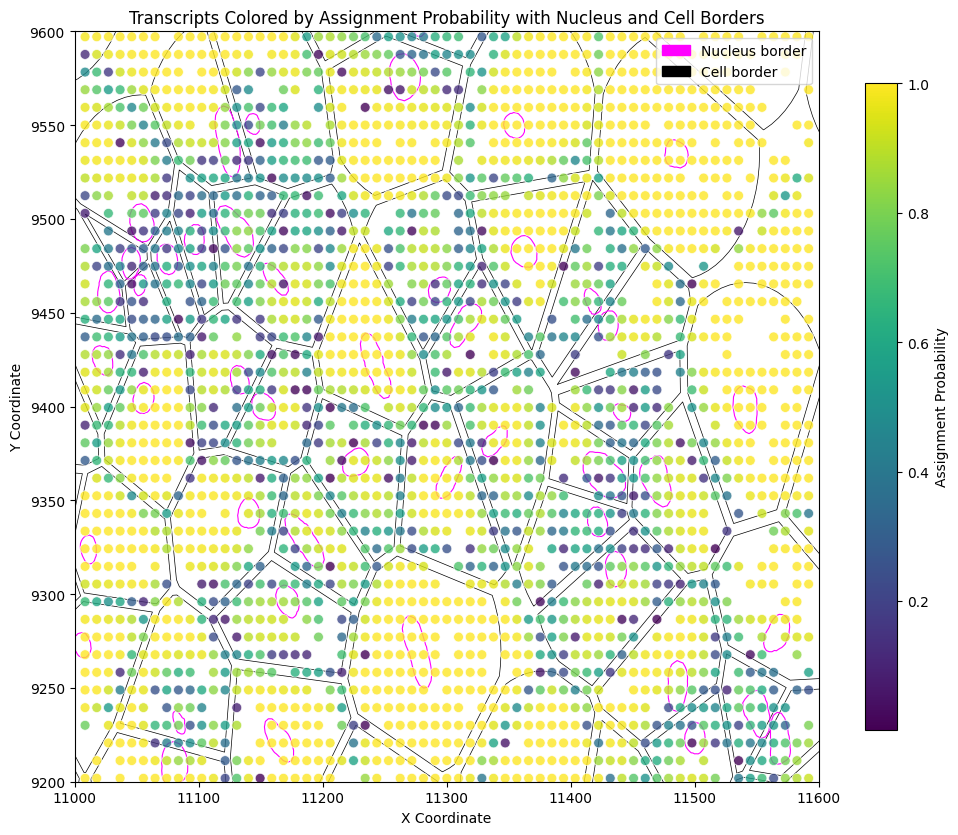

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch
from shapely.geometry import box
import geopandas as gpd

# Define bounding box
bbox = (11000, 9200, 11600, 9600) # xmin, ymin, xmax, ymax

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the GeoDataFrame polygons (cell borders) within the bounding box
gdf_clip.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)

# Plot the nucleus borders within the bounding box
stardist_clip.plot(ax=ax, edgecolor='magenta', facecolor='none', linewidth=0.8)

# Plot the transcript data points, colored by assignment probability
sns.scatterplot(
    x=transcripts_with_assignments['center_x'],
    y=transcripts_with_assignments['center_y'],
    hue=transcripts_with_assignments['assignment_probability'],
    palette='viridis',
    ax=ax,
    marker='o',
    s=50,  # Adjust size as needed
    alpha=0.8
)

# Set plot limits based on bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

# Add colorbar for assignment probability
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=transcripts_with_assignments['assignment_probability'].min(), vmax=transcripts_with_assignments['assignment_probability'].max()))
cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label('Assignment Probability')

# Add legend for nucleus and cell borders
legend_elements = [
    Patch(color='magenta', label='Nucleus border'),
    Patch(color='black', label='Cell border'),
]
ax.legend(handles=legend_elements, loc='upper right')

# Set title and labels
plt.title('Transcripts Colored by Assignment Probability with Nucleus and Cell Borders')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.show()
